In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
%matplotlib inline
from sklearn.cross_validation import train_test_split

In [2]:
df = pd.read_csv('../other/frac_merge_peak.csv')

In [7]:
X = df[[u'Completed_Feet', u'#_of_Stages', u'Stage_Length', u'Clusters/Stage', u'Cluster_Spacing', u'Perfs/Cluster', 
        u'Fluid_Bbls', u'Fluid_Gal/Ft', u'Fluid_Gal/Cluster', u'Fluid_Gal/Perf', u'Prop_Lbs', u'Prop_Lbs/Ft', 
        u'Prop_Lbs/Cluster', u'Prop_Lbs/Perf', u'Avg_Prop_Conc', u'Max_Prop_Conc', u'Avg_Rate', u'Max_Rate', 
        u'Rate/Ft', u'Rate/Cluster', u'Rate/Perf', u'Avg_Pressure', u'Max_Pressure', u'ISIP/Ft', u'5"_SIP/Ft', 
        u'XEC_FIELD', u'Reservoir']]
y = df[[u'OIL_Peak']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_train_subset = X_train[[u'Clusters/Stage', u'Perfs/Cluster', u'#_of_Stages', u'Fluid_Bbls']]
X_train_subset.shape

(133, 4)

In [10]:
data = dict(x=X_train_subset, y=y_train)

with pm.Model() as model:
    pm.glm.glm('y ~ x', data)
    step = pm.NUTS()
    trace = pm.sample(2000, step, progressbar=True)

Applied log-transform to sd and added transformed sd_log_ to model.
100%|██████████| 2000/2000 [00:12<00:00, 155.22it/s]


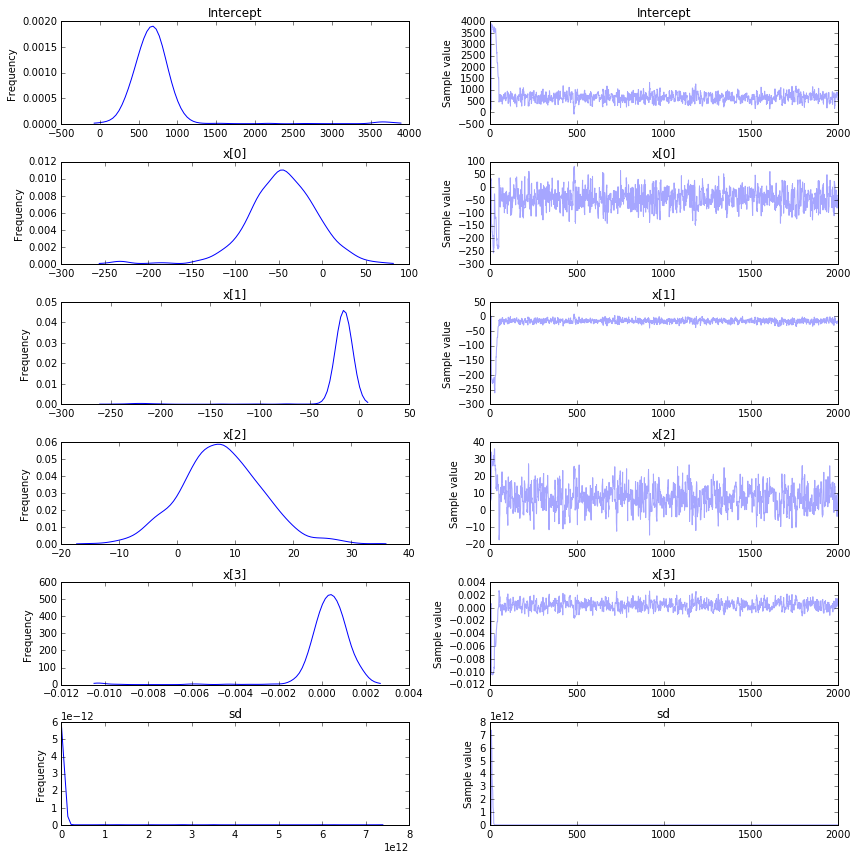

In [12]:
pm.traceplot(trace);